In [2]:
# Importing pandas library
import pandas as pd


In [3]:
# Reading the dataset
dataset=pd.read_csv('50_Startups.csv')

In [4]:
# describing the  data
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
# dealing with  categorical values
dataset['State'].unique()
dict={'New York':1,'California':2,'Florida':3}
dataset['State']=dataset['State'].replace(dict)

In [6]:
# Finding the correlation 
dataset.corr(method='pearson')

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


In [21]:
# Creating the array of tuples which are independent  using Numpy library
import numpy as np
RD=list(dataset['R&D Spend'].values)
Ad=list(dataset['Administration'].values)
MS=list(dataset['Marketing Spend'].values)

x=np.array(list(zip(RD,MS)))
x


array([[165349.2 , 471784.1 ],
       [162597.7 , 443898.53],
       [153441.51, 407934.54],
       [144372.41, 383199.62],
       [142107.34, 366168.42],
       [131876.9 , 362861.36],
       [134615.46, 127716.82],
       [130298.13, 323876.68],
       [120542.52, 311613.29],
       [123334.88, 304981.62],
       [101913.08, 229160.95],
       [100671.96, 249744.55],
       [ 93863.75, 249839.44],
       [ 91992.39, 252664.93],
       [119943.24, 256512.92],
       [114523.61, 261776.23],
       [ 78013.11, 264346.06],
       [ 94657.16, 282574.31],
       [ 91749.16, 294919.57],
       [ 86419.7 ,      0.  ],
       [ 76253.86, 298664.47],
       [ 78389.47, 299737.29],
       [ 73994.56, 303319.26],
       [ 67532.53, 304768.73],
       [ 77044.01, 140574.81],
       [ 64664.71, 137962.62],
       [ 75328.87, 134050.07],
       [ 72107.6 , 353183.81],
       [ 66051.52, 118148.2 ],
       [ 65605.48, 107138.38],
       [ 61994.48,  91131.24],
       [ 61136.38,  88218.23],
       [

In [22]:
# Finding the total no of tuples who expenditure is zero in  Administration,MArketing and R&D
sum(x==0)
# 2 rows with the value zero money spend in R&D 
# all rows spend in Administration
# 3 rows spending zero amount in Marketing

array([2, 3])

In [23]:
# Creating an array with profits
y=np.array(dataset['Profit'].values)   
y


array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [24]:
# Splitting the data for training and testing using Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=100)

In [25]:
# Importing LinearRegression and r2_score from sklearn for creating the  model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [26]:
# Predicting the values for x_test using the model 
y_pred=model.predict(x_test)
r2_score(y_true=y_test,y_pred=y_pred)


0.9360772335861094

<AxesSubplot:>

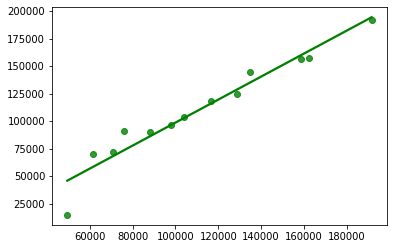

In [27]:
# Plotting the Regression Line using the Seaborn library
 
import seaborn as sns

sns.regplot(x=y_pred,y=y_test,color='g',ci=None)